This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

-NOTE- 

Q1. Fitting a MNIST model with randomly shuffled labels.
Visualize training accuracy and validation accuracy.

A1. Plotting validation파트에 orginal 데이터 추가후 시각화


# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model3 = get_model()
history_orignal = model3.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 4ms/step - loss: 0.6231 - accuracy: 0.8087 - val_loss: 0.3096 - val_accuracy: 0.9041
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2539 - accuracy: 0.9219 - val_loss: 0.2757 - val_accuracy: 0.9122
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1647 - accuracy: 0.9496 - val_loss: 0.1626 - val_accuracy: 0.9507
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1167 - accuracy: 0.9633 - val_loss: 0.2177 - val_accuracy: 0.9327
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0854 - accuracy: 0.9732 - val_loss: 0.1255 - val_accuracy: 0.9636
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0637 - accuracy: 0.9799 - val_loss: 0.1226 - val_accuracy: 0.9675
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0465 - accuracy: 0.9854 - val_loss: 0.1223 - val_accuracy: 0.9670
Epoch 

**Plotting a validation accuracy comparison**

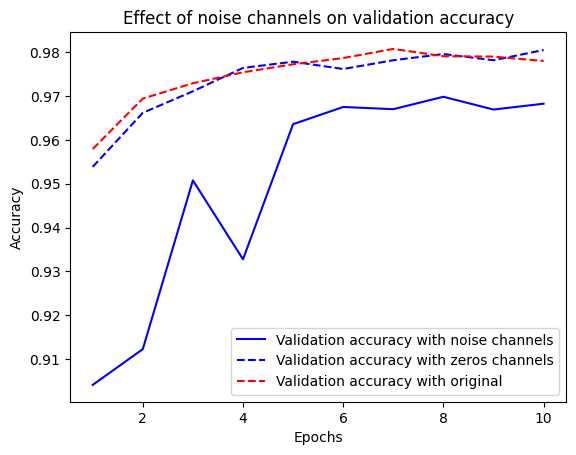

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_orignal.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--",
         label="Validation accuracy with original")
plt.title("Effect of noise channels on validation accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3148 - accuracy: 0.1040 - val_loss: 2.3066 - val_accuracy: 0.1051
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2988 - accuracy: 0.1175 - val_loss: 2.3104 - val_accuracy: 0.1054
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2910 - accuracy: 0.1268 - val_loss: 2.3127 - val_accuracy: 0.1075
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2791 - accuracy: 0.1419 - val_loss: 2.3208 - val_accuracy: 0.1031
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2630 - accuracy: 0.1527 - val_loss: 2.3273 - val_accuracy: 0.1055
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2432 - accuracy: 0.1644 - val_loss: 2.3504 - val_accuracy: 0.1053
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2194 - accuracy: 0.1818 - val_loss: 2.3588 - val_accuracy: 0.1023

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 820.0791 - accuracy: 0.3379 - val_loss: 2.3341 - val_accuracy: 0.2365
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.4081 - accuracy: 0.2198 - val_loss: 2.6635 - val_accuracy: 0.1898
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 3.1894 - accuracy: 0.1862 - val_loss: 2.1295 - val_accuracy: 0.1893
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3802 - accuracy: 0.2101 - val_loss: 2.1966 - val_accuracy: 0.2177
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7398 - accuracy: 0.1936 - val_loss: 2.1940 - val_accuracy: 0.1867
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4039 - accuracy: 0.2015 - val_loss: 2.1927 - val_accuracy: 0.1906
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3078 - accuracy: 0.1945 - val_loss: 2.2768 - val_accuracy: 0.2127
Epoc

**The same model with a more appropriate learning rate**

In [10]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)
histoy_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3450 - accuracy: 0.9105 - val_loss: 0.1282 - val_accuracy: 0.9625
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1327 - accuracy: 0.9636 - val_loss: 0.1229 - val_accuracy: 0.9669
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0967 - accuracy: 0.9737 - val_loss: 0.1538 - val_accuracy: 0.9646
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0793 - accuracy: 0.9796 - val_loss: 0.1461 - val_accuracy: 0.9687
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9820 - val_loss: 0.1665 - val_accuracy: 0.9677
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0591 - accuracy: 0.9845 - val_loss: 0.1765 - val_accuracy: 0.9703
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0480 - accuracy: 0.9880 - val_loss: 0.1789 - val_accuracy: 0.9705
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [11]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6636 - accuracy: 0.8332 - val_loss: 0.3609 - val_accuracy: 0.9047
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3544 - accuracy: 0.9019 - val_loss: 0.3115 - val_accuracy: 0.9133
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3184 - accuracy: 0.9123 - val_loss: 0.2925 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3025 - accuracy: 0.9153 - val_loss: 0.2851 - val_accuracy: 0.9207
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2924 - accuracy: 0.9182 - val_loss: 0.2792 - val_accuracy: 0.9229
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2855 - accuracy: 0.9205 - val_loss: 0.2750 - val_accuracy: 0.9231
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2808 - accuracy: 0.9215 - val_loss: 0.2725 - val_accuracy: 0.9258
Epoch 

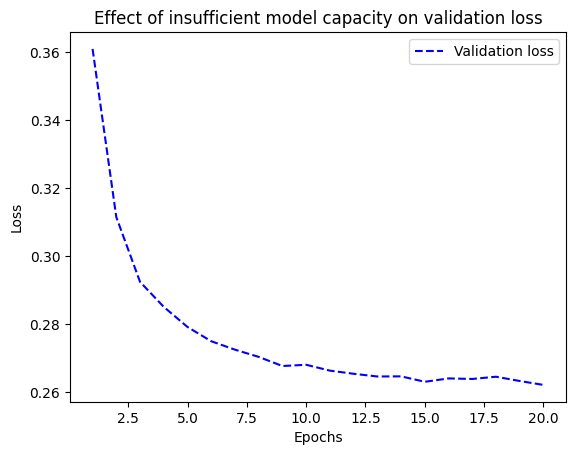

In [12]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [11]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3705 - accuracy: 0.8963 - val_loss: 0.2376 - val_accuracy: 0.9306
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1662 - accuracy: 0.9508 - val_loss: 0.1361 - val_accuracy: 0.9613
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1181 - accuracy: 0.9658 - val_loss: 0.1211 - val_accuracy: 0.9649
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0920 - accuracy: 0.9715 - val_loss: 0.1093 - val_accuracy: 0.9675
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0738 - accuracy: 0.9777 - val_loss: 0.1039 - val_accuracy: 0.9695
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0604 - accuracy: 0.9817 - val_loss: 0.1209 - val_accuracy: 0.9664
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0492 - accuracy: 0.9850 - val_loss: 0.0908 - val_accuracy: 0.9746
Epoch 

In [17]:
import matplotlib.pyplot as plt
val_small_loss = history_small_model.history["val_loss"]
val_large_loss = history_large_model.history["val_loss"]
val_original_loss = history_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_small_loss, "b--",
         label = "Validation small loss")
plt.plot(epochs, val_large_loss, "r--",
         label = "Validation large loss")
plt.plot(epochs, val_original_loss, "g--",
         label = "Validation original loss")
plt.title("Effect of inlarger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

NameError: ignored

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [13]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5292 - accuracy: 0.7695 - val_loss: 0.4053 - val_accuracy: 0.8570
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3271 - accuracy: 0.8933 - val_loss: 0.3181 - val_accuracy: 0.8793
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2454 - accuracy: 0.9201 - val_loss: 0.2842 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1988 - accuracy: 0.9349 - val_loss: 0.2755 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1675 - accuracy: 0.9449 - val_loss: 0.2968 - val_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1422 - accuracy: 0.9544 - val_loss: 0.2908 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1245 - accuracy: 0.9610 - val_loss: 0.3016 - val_accuracy: 0.8835
Epoch 8/20
30

**Version of the model with lower capacity**

In [14]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5960 - accuracy: 0.7504 - val_loss: 0.5160 - val_accuracy: 0.8371
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4571 - accuracy: 0.8681 - val_loss: 0.4298 - val_accuracy: 0.8702
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3705 - accuracy: 0.8958 - val_loss: 0.3702 - val_accuracy: 0.8787
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3096 - accuracy: 0.9125 - val_loss: 0.3374 - val_accuracy: 0.8807
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2654 - accuracy: 0.9241 - val_loss: 0.3137 - val_accuracy: 0.8841
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2318 - accuracy: 0.9338 - val_loss: 0.2935 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2053 - accuracy: 0.9418 - val_loss: 0.2885 - val_accuracy: 0.8855
Epoch 8/20
30

**Version of the model with higher capacity**

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5617 - accuracy: 0.7581 - val_loss: 0.6525 - val_accuracy: 0.6745
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3207 - accuracy: 0.8679 - val_loss: 0.3494 - val_accuracy: 0.8516
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2396 - accuracy: 0.9067 - val_loss: 0.2754 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1856 - accuracy: 0.9285 - val_loss: 0.2776 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1506 - accuracy: 0.9441 - val_loss: 0.2748 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0934 - accuracy: 0.9690 - val_loss: 0.4906 - val_accuracy: 0.8455
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0996 - accuracy: 0.9652 - val_loss: 0.3144 - val_accuracy: 0.8858
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [15]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.6214 - accuracy: 0.7567 - val_loss: 0.4694 - val_accuracy: 0.8711
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4055 - accuracy: 0.8911 - val_loss: 0.3928 - val_accuracy: 0.8813
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3302 - accuracy: 0.9147 - val_loss: 0.3679 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2956 - accuracy: 0.9235 - val_loss: 0.3665 - val_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2706 - accuracy: 0.9347 - val_loss: 0.3826 - val_accuracy: 0.8777
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2541 - accuracy: 0.9426 - val_loss: 0.3934 - val_accuracy: 0.8745
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2406 - accuracy: 0.9477 - val_loss: 0.3681 - val_accuracy: 0.8849
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [16]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.6477 - accuracy: 0.6217 - val_loss: 0.5756 - val_accuracy: 0.6845
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5509 - accuracy: 0.7832 - val_loss: 0.5072 - val_accuracy: 0.8604
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4849 - accuracy: 0.8421 - val_loss: 0.4502 - val_accuracy: 0.8644
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4302 - accuracy: 0.8697 - val_loss: 0.4065 - val_accuracy: 0.8794
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3834 - accuracy: 0.8871 - val_loss: 0.3839 - val_accuracy: 0.8782
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3464 - accuracy: 0.9010 - val_loss: 0.3531 - val_accuracy: 0.8802
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3100 - accuracy: 0.9167 - val_loss: 0.3865 - val_accuracy: 0.8707
Epoch 8/20
30

## Summary